In [1]:
import sys, os
sys.path.append(os.path.abspath('../..'))

# Animations
There are currently two different approaches implemented to make moving images of the simulation :
 - **Live Animation**: Shows the model state live during the simulation (doesn't create a video).
 - **Video Animation**: Adds a figure to a video every ... time step. 

In [2]:
# load the modules
from fridom.NonHydrostatic.ModelSettings import ModelSettings
from fridom.NonHydrostatic.Grid import Grid
from fridom.NonHydrostatic.InitialConditions import BarotropicJet, SingleWave
from fridom.NonHydrostatic.Model import Model
from fridom.NonHydrostatic.Plot import Plot
from fridom.NonHydrostatic.ModelPlotter import ModelPlotter

## Live Animation
To create a live animation we need to build a plotting class on top of the ModelPlotter class.

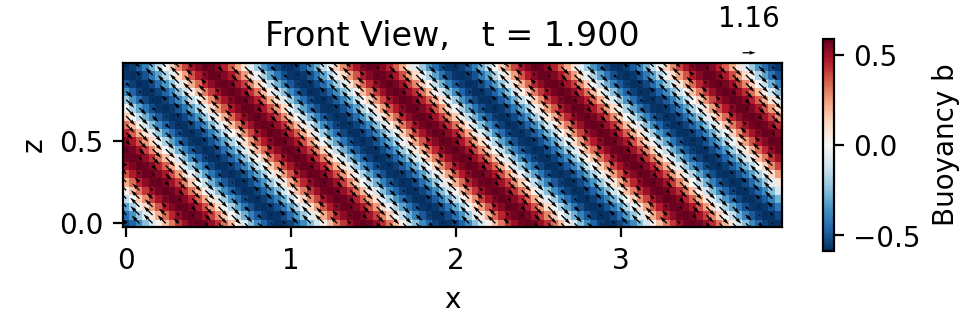

In [3]:
# Define the plotter
class MyPlotter(ModelPlotter):
    def update_figure(fig, z, p, time, **kwargs):
        # arguments must be (fig, z, p, time, **kwargs)
        # Any figure properties can be updated here
        Plot(z.b).front(z, fig=fig)
        fig.gca().set_title(f"Front View,   t = {time:.3f}")
        return


# Now build the model
mset = ModelSettings(L=[4, 4, 1], N=[100, 100, 20])
mset.enable_live_anim = True
mset.live_plotter = MyPlotter
mset.enable_tqdm = False        # is not compatible with live plotting
grid = Grid(mset)
model = Model(mset, grid)
model.z = SingleWave(mset, grid)
model.run(runlen=2)

## Video Animation
The video animation works similar to the live animation, we can use the same plotter class or define a different one.

In [5]:
mset = ModelSettings(L=[4, 4, 1], N=[100, 100, 20])
mset.gpu = True
mset.enable_vid_anim = True
mset.vid_plotter = MyPlotter
mset.vid_anim_interval = 20
grid = Grid(mset)
model = Model(mset, grid)
model.z = SingleWave(mset, grid)
model.run(runlen=2.0)
model.show_video()

  1%|          | 8/1000 [00:00<00:13, 72.28it/s]

100%|██████████| 1000/1000 [00:11<00:00, 83.81it/s]


1
